# Comparação das expectativas de vida nos distritos do município de São Paulo

In [1]:
import pandas as pd
import matplotlib.pyplot as pl
import sys

sys.path.append("../80_material-complementar/")
import auxiliar.zip as az

## 1. Carregando os dados

Vamos carregar os dados já limpos e organizados. Para ver como eles foram obtidos a partir dos dados brutos (e para aprender um pouco sobre limpeza de dados), veja o notebook:
[20_limpeza-tratamento-dados_mortalidade.ipynb](20_limpeza-tratamento-dados_mortalidade.ipynb).

Como o nome do arquivo mostra, ele contém o número de óbitos de residentes ocorridos entre 2010 e 2019 em cada 
[distrito do município de São Paulo](https://upload.wikimedia.org/wikipedia/commons/5/56/Mapa_sp.svg).

In [2]:
# Baixando os dados:
url_fonte = 'http://henriquexavier.net/nucleo/obitos-resid_por_idade_distrito-resid_2010-2019_limpo.zip'
arquivos  = ['obitos-resid_por_idade_distrito-resid_2010-2019_limpo.csv']
az.sincronizar_arquivos(url_fonte, './dados/limpos/', arquivos)

# Carregando os dados:
obitos_por_distrito_df = pd.read_csv('dados/limpos/obitos-resid_por_idade_distrito-resid_2010-2019_limpo.csv')

Arquivos já foram baixados


Vamos ver como são os dados carregados:

In [3]:
# Vendo a cara dos dados:
obitos_por_distrito_df

,Idade Detalhada,Água Rasa,Alto de Pinheiros,Anhanguera,Aricanduva,Artur Alvim,Barra Funda,Bela Vista,Belém,Bom Retiro,...,Vila Formosa,Vila Guilherme,Vila Jacuí,Vila Leopoldina,Vila Maria,Vila Mariana,Vila Matilde,Vila Medeiros,Vila Prudente,Vila Sônia
0,0,75,22,128,106,163,31,68,98,65,...,118,76,287,35,258,76,126,224,121,150
1,1,11,2,8,3,10,1,5,12,6,...,5,6,18,4,12,12,11,22,11,5
2,2,3,1,2,2,3,2,0,6,3,...,5,3,17,0,6,8,4,7,4,4
3,3,6,0,5,3,3,0,2,0,3,...,2,3,8,2,2,5,2,6,3,2
4,4,0,0,4,0,2,0,4,3,2,...,2,0,4,1,4,7,2,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,113,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114,114,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115,115,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
116,116,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Vemos que:
* a primeira coluna contém a idade (em anos completos) da pessoa no momento de seu falecimento;
* as demais colunas contém o número de óbitos em um determinado distrito, por idade.

Por exemplo:
* Entre 2010 e 2019, no distrito de Água Rasa, tivemos 75 óbitos de pessoas com menos de 1 ano completo.
* Nesse mesmo período, na Vila Maria, tivemos 4 óbitos de pessoas com 4 anos de idade.
* No distrito de Artur Alvim, não tivemos nenhum óbito de pessoas com 113 anos ou mais.

## 2. Analisando os dados

<a id='distribuicao'></a>
### 2.1. Distribuição de óbitos por idade

Um conceito muito utilizado em análise de dados é o de _distribuição_. A distribuição nos informa como a ocorrência de algo (no nosso caso, os óbitos) 
está distribuída de acordo com uma certa característica ou variável (no nosso caso, a idade). Por exemplo: quantos óbtidos temos no distrito de Cidade Tiradentes, em cada idade? 
Em outras palavras: qual a distribuição dos óbitos por idade, nesse distrito?
Analisar a distribuição pode nos trazer informações importantes.

A nossa tabela de dados já nos dá exatamente isso. Abaixo, vamos mostrar essa distribuição em um gráfico e comparar quatro distritos: Cidade Tiradentes, Anhanguera (dois distritos periféricos), Vila Mariana e Alto de Pinheiros (local onde mora o ex-presidente e golpista [Michel Temer](https://pt.wikipedia.org/wiki/Michel_Temer)).

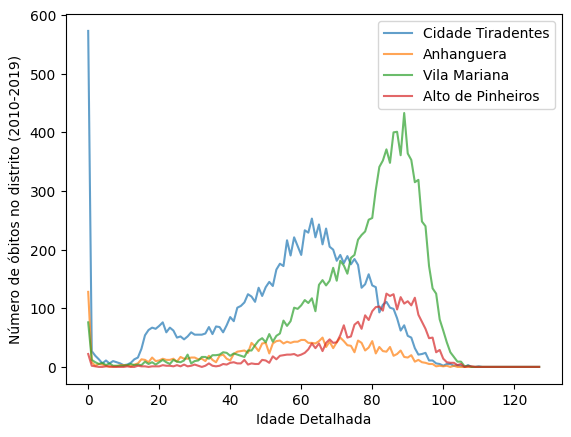

In [4]:
# Comparando a distribuição dos óbitos por idade, para diferentes distritos:
distritos_selecionados = ['Cidade Tiradentes', 'Anhanguera', 'Vila Mariana', 'Alto de Pinheiros']
for distrito in distritos_selecionados:
    obitos_por_distrito_df.set_index('Idade Detalhada')[distrito].plot(label=distrito, alpha=0.7)
pl.ylabel('Número de óbitos no distrito (2010-2019)')
pl.legend()
pl.show()

Caso você não saiba como entender o gráfico acima, veja o notebook: 
[../80_material-complementar/20_como_ler_graficos.ipynb](../80_material-complementar/20_como_ler_graficos.ipynb).

O gráfico acima mostra que, na Cidade Tiradentes:
* a _mortalidade infantil_ (óbitos de bebês com menos de 1 ano completo) é alta, chegando a quase 600 óbitos no período 2010-2019;
* para crianças mais velhas, o número de óbitos cai bastante, se aproximando de zero;
* existe um aumento brusco no número de óbitos a partir dos 15 anos, chegando a 60 para pessoas com 17 anos (uma análise das causas de morte mostra que esse aumento é causado pela violência, que atinge principalmente jovens periféricos do sexo masculino);
* o número de óbitos cresce até, mais ou menos, os 60 anos, quando começa a diminuir novamente;
* aos 100 anos, o número de óbitos já quase zero novamente.

Cada distrito selecionado parece ter uma distribuição diferente dos demais. Será mesmo? Como comparar com outros distritos que podem ser muito maiores ou muito menores? Veremos isso na seção seguinte.

<a id="total-obitos"></a>
### 2.2. Total de óbitos por distrito

Uma coisa que dificulta a comparação da distribuição dos óbitos entre os distritos é que cada distrito tem um tamanho (em número de residentes) diferente. Como ninguém vive para sempre, um distrito com mais residentes também vai ter um número total de óbitos maior. Mas isso não significa que esse seja um distrito mais "mortífero". Vejamos o total de óbitos nos distritos selecionados:

In [5]:
# Número total de óbitos por distrito:
obitos_por_distrito_df[distritos_selecionados].sum().sort_values()

Anhanguera            2355
Alto de Pinheiros     3174
Cidade Tiradentes    10248
Vila Mariana         10737
dtype: int64

No código acima, primeiro selecionamos apenas as colunas dos distritos listados em `distritos_selecionados` e depois aplicamos o método `.sum()`. 
Esse método soma os números para cada coluna da tabela e retorna esses resultados como uma série. Em seguida, aplicamos o método `.sort_values()` para ordenar essa série (em ordem crescente) pelos valores. Caso quiséssemos ordenar em ordem decrescente, poderíamos utilizar `.sort_values(ascending=False)`.

Vemos que o número total de óbitos da Cidade Tiradentes é próximo do da Vila Mariana. 
Já o de [Alto de Pinheiros](https://www.youtube.com/watch?v=DmZIM9gec-4) é bem menor porque ele é um distrito pequeno, com muitas casas grandes e poucos prédios (diferentemente da Vila Mariana).

### 2.3. Como comparar distritos de tamanhos diferentes: normalização

Por causa dessas diferenças de tamanho dos distritos, faz mais sentido comparar a _fração_ dos óbitos que ocorrem em cada idade, ou o número de óbitos que ocorrem em cada idade para um mesmo número total de óbitos. Para calcular a fração de óbitos por idade, basta dividir o número de óbitos em cada idade pelo número total de óbitos. Vamos construir uma função que faz isso:

In [6]:
def calcula_fracao(serie):
    """
    Retorna a `serie` normalizada (isto é, dividida pelo seu total).
    """
    
    total  = serie.sum()
    fracao = serie / total
    
    return fracao

In [7]:
# Calcula a fração de óbitos para um distrito:
calcula_fracao(obitos_por_distrito_df['Cidade Tiradentes'])

0      0.055913
1      0.002635
2      0.001854
3      0.001269
4      0.000585
         ...   
113    0.000000
114    0.000000
115    0.000000
116    0.000000
117    0.000000
Name: Cidade Tiradentes, Length: 118, dtype: float64

Se quisermos, podemos calcular quantos óbitos temos numa dada idade a cada 10.000 óbitos totais. É como se estivéssemos nos perguntando: "se os distritos tivessem o mesmo número de residentes (e, portanto, de óbitos), quantos óbitos teríamos em cada idade? Ou então: "se selecionarmos 10.000 óbitos de cada distrito, como esperamos que eles estejam distribuídos por idade"? Vamos criar uma função que faz esse cálculo:

In [8]:
def num_a_cada_X(serie, X):
    """
    Calcula quantas ocorrências temos em cada item da `serie` 
    a cada `X` ocorrências totais.
    
    Por exemplo: o número de óbitos por idade para cada 
    1000 óbitos totais.
    """
    
    fracao = calcula_fracao(serie)
    num = X * fracao
    
    return num

Vamos aplicar essa normalização e refazer o gráfico:

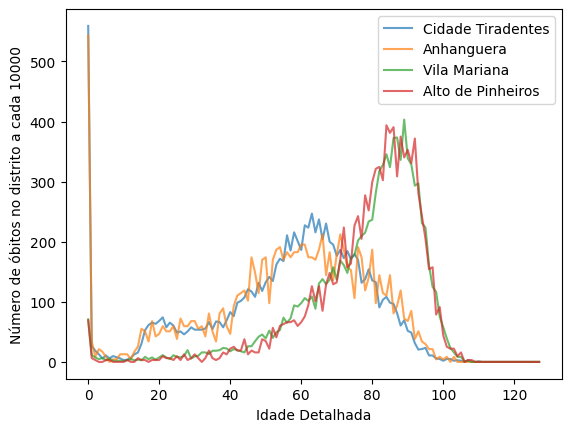

In [9]:
a_cada = 10000
for distrito in distritos_selecionados:
    num_a_cada_X(obitos_por_distrito_df.set_index('Idade Detalhada')[distrito], a_cada).plot(label=distrito, alpha=0.7)
pl.ylabel('Número de óbitos no distrito a cada {}'.format(a_cada))
pl.legend()
pl.show()

Caramba! As distribuições dos distritos Cidade Tiradentes e Anhanguera, ambos da periferia, são bem parecidas entre si, mesmo estando em lados opostos da cidade! 
E as distribuições dos distritos Alto de Pinheiros e Vila Mariana, ambos de classe média e alta, também. 
Isso indica que as causas dos óbitos nesses distritos não são particularidades suas ou de suas localizações geográficas, mas sim algo em comum entre eles. 
Além disso, a diferença entre as distribuições das periferias e dos bairros ricos é clara. 
Vamos analisar esse gráfico em detalhe.

### 2.4. Análise da distribuição normalizada

#### 2.4.1. Ruído (flutuação estatística)

Veja como todas as linhas sobem e descem rapidamente quando passamos de uma idade (em anos) para uma idade vizinha. 
Em outras palavras, elas apresentam variações (chamadas de _flutuações_) bruscas.

Por exemplo: o número de óbitos a cada 10.000 para o distrito de Anhanguera sai de 102 na idade de 45 anos, sobe a 
174 para 46, volta a 115 óbitos para 48 anos e sobe de novo para 170 em 49:

In [10]:
# Número de óbitos por idade a cada 10.000: 
num_a_cada_X(obitos_por_distrito_df.set_index('Idade Detalhada')['Anhanguera'], a_cada).loc[45:49]

Idade Detalhada
45    101.910828
46    174.097665
47    148.619958
48    114.649682
49    169.851380
Name: Anhanguera, dtype: float64

Será que conseguimos identificar algum significado nessas variações? Será que esse é um padrão que se repete em outros distritos ou que se repetiria em outros períodos? A resposta é _não_. Seria muito estranho se os óbitos nas periferias fossem mais comuns para pessoas com exatamente 46 anos do que para pessoas com 45 e com 48 anos. 

Na verdade, essas flutuações são causadas por uma combinação grande de detalhes e particularidades dos acontecimentos dessa época e local. São coisas que não se repetem, não seguem um padrão. Logo, as chamamos de _flutuações aleatórias_ ou de _flutuações estatísticas_. Você vai encontrar essas flutuações frequentemente em análises de dados. Não perca tempo tentando encontrar algum significado nelas.

**Dica:** note que essas flutuações são mais amplas (as linhas sobem e descem mais) para os distritos com menos residentes: Anhanguera e Alto de Pinheiros. Isso acontece porque um óbito a mais dentre 10 corresponde a uma variação de 10%, enquanto que um óbito a mais em 50 corresponde a uma variação de 2%.  

#### 2.4.2. Mortalidade infantil

Ao contrário das flutuações estatísticas, que são diferentes para cada distrito, vemos que o número de óbitos de pessoas com menos de um ano é sempre maior do que os números para as idades seguintes, 
para todos os distritos. Esse número sistematicamente maior tem significado e está associado à _[mortalidade infantil](https://brasilescola.uol.com.br/o-que-e/geografia/o-que-e-mortalidade-infantil.htm)_, 
que é um indicador social representado pelo número de crianças que morreram antes de completar um ano de vida a cada mil crianças nascidas vivas.

O gráfico mostra que a quantidade de óbitos de bebês a cada 10.000 é muito maior nas periferias que nos bairros ricos. A chance de uma pessoa morrer antes de completar um ano é cerca de 6 vezes maior nesses bairros.

#### 2.4.3. Violência

Outra característica comum aos bairros periféricos é um súbito aumento de mortes na entrada da adolescência, algo que não é observado nos bairros ricos. 
Essas mortes são causadas principalmente por homicídio e atingem jovens do sexo masculino, mais comumente pardos e pretos. Isso pode ser constatado se filtrarmos 
os dados do DataSUS por causa de morte e por sexo e cor/raça. 

#### 2.4.4. Falta de acesso à saúde

Tirando esse aumento súbito de óbitos na adolescência, resultado da violência, os demais óbitos tem como causas problemas de saúde.
Outro padrão muito evidente nas distribuições é que, nos bairros ricos, grande parte dos óbitos acontecem com mais de 80 anos. 
Enquanto isso, nas periferias, os óbitos são mais comuns entre 40 e 80 anos.

Note que as mortes prematuras nos bairros periféricos não são consequência de falta de conhecimento ou de capacidade médica e técnica. 
O fato de existirem outros grupos sociais que tipicamente morrem com idades mais altas mostra isso. Basta que haja interesse em prover os métodos de prevenção e tratamento conhecidos para todos. 

#### 2.4.5. Análise global da distribuição

Note como a mortalidade infantil, por violência e por falta de acesso à prevenção e tratamento em saúde andam juntas, isto é: distritos onde há mais violência também há mais mortalidade infantil e mortes precoces por problemas de saúde. Esse fato não é óbvio: por que locais onde há mais violência também há mais problemas de saúde? Esses não são problemas sociais separados, de naturezas diferentes? Nesse caso, não deveríamos esperar que alguns distritos tivessem mortalidade infantil alta mas violência baixa, outros ao contrário, e assim por diante? Por que essa "mania" desses problemas andarem juntos?

O fato dos problemas sociais andarem juntos indica que eles possuem uma causa comum. Se existe um causa comum, faria sentido buscar reduzir a violência exclusivamente por meio de mais repressão policial, por exemplo? Essa estratégia não estaria deixando a causa da violência de fora?

## 3. A expectativa de vida

### 3.1. Como calcular

Vamos calcular a [expectativa de vida ao nascer](https://www.infoescola.com/demografia/expectativa-de-vida/) nos diferentes distritos de São Paulo. 
A expectativa de vida nada mais é do que uma _medida de tendência central_ da idade das pessoas ao falecerem; mais especificamente, sua média. 
Para conhecer mais sobre medidas de tendência central (moda, mediana e média), veja o tutorial [15_medidas-de-tendencia-central.ipynb](15_medidas-de-tendencia-central.ipynb).

Para cada distrito, o cálculo da idade média ao falecer pode ser feito:
1. pegando cada idade (em anos);
2. multiplicando-a pelo número de pessoas que faleceram com aquela idade;
3. somando os resultados dessa multiplicação;
4. dividindo essa soma pelo número total de pessoas no distrito.

O código abaixo faz isso de uma vez só para todos os distritos:

In [11]:
# Cria uma tabela sem a coluna da idade (isto é, só com o número de óbitos por distrito):
soh_obitos_df = obitos_por_distrito_df.iloc[:, 1:]
# Calcula o total de pessoas que faleceram em cada distrito:
total_pessoas = soh_obitos_df.sum()
# Cálcula a expectativa de vida:
exp_vida = soh_obitos_df.multiply(obitos_por_distrito_df['Idade Detalhada'], axis=0).sum() / total_pessoas

Na última linha, fazemos o uso do método `.multiply()`. Esse método é útil pois nos permite multiplicar todas as colunas do DataFrame `soh_obitos_df` pela coluna de idades. 
O parâmetro `axis=0` informa ao método que cada valor da série de idades deve ser multiplicado por uma linha do DataFrame `soh_obitos_df`. 

Após a multiplicação, o resultado é somado dentro de cada distrito, e depois dividido pelo total de pessoas que faleceram em cada distrito. 
Para relembrar a explicação do método `.sum()`, veja a seçao sobre o [total de óbitos por distrito](#total-obitos).

Abaixo apresentamos os distritos ordenados por expectativa de vida:

In [12]:
# Ranking da expectativa de vida dos distritos de Sâo Paulo:
ranking_exp_vida = exp_vida.sort_values()
ranking_exp_vida

Cidade Tiradentes    55.151054
Jardim Ângela        55.486721
Anhanguera           55.576645
Iguatemi             56.504711
Grajaú               56.624504
                       ...    
Pinheiros            77.952409
Consolação           78.064889
Moema                78.380097
Alto de Pinheiros    78.576560
Jardim Paulista      78.935946
Length: 96, dtype: float64

Vemos que **a diferença na expectativa de vida entre os distritos chega a quase 24 anos**. No distrito Jardim Paulista (onde mora o empresário João Dória, também ex-governador de São Paulo), a expectativa de vida é de quase 79 anos. Já na Cidade Tiradentes, distrito da periferia da cidade, a expectativa de vida é de, aproximadamente, 55 anos. Isso não chega nem na idade mínima para mulheres se aposentarem depois na reforma da previdência de 2019, de 62 anos.

In [13]:
# Vamos salvar o resultado:
exp_vida_df = pd.DataFrame({'exp_vida_anos': ranking_exp_vida})
exp_vida_df.index.name = 'distrito'
#exp_vida_df.to_csv('dados/processados/expectativa-de-vida_distritos-SP.csv')

### 3.2. Interpretação dos resultados

### 3.3. Visualização em um mapa

Como a expectativa de vida que calculamos está vinculada a regiões da cidade, é interessante visualizá-la em um mapa, o que pode trazer um melhor entendimento dessa desigualdade. Faremos isso no notebook: [17_visualizando-dados-geograficos.ipynb](17_visualizando-dados-geograficos.ipynb).